In [1]:
"""
keras + tf2.0 demo
"""

'\nkeras + tf2.0 demo\n'

In [2]:
import tensorflow as tf

print(tf.__version__)

2.0.0


## constant

In [3]:
x = tf.constant([[1,2], [3,4]])
print(x)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [4]:
x.numpy()

array([[1, 2],
       [3, 4]], dtype=int32)

In [5]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [6]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: id=12, shape=(2, 2), dtype=float32, numpy=
array([[-0.1742278, -1.2518135],
       [-1.0249736,  0.526755 ]], dtype=float32)>

In [7]:
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: id=16, shape=(2, 2), dtype=int32, numpy=
array([[3, 5],
       [8, 1]], dtype=int32)>

## variable

In [8]:
initial_value = tf.random.normal(shape=(2,2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.0731978 ,  0.46990612],
       [ 1.2018205 , -1.0470343 ]], dtype=float32)>


In [11]:
assign_value = tf.random.normal(shape=(2,2))
assign_value

<tf.Tensor: id=36, shape=(2, 2), dtype=float32, numpy=
array([[ 1.8177125 , -0.07554638],
       [-0.7968218 , -1.0385307 ]], dtype=float32)>

In [12]:
a.assign(assign_value)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[ 1.8177125 , -0.07554638],
       [-0.7968218 , -1.0385307 ]], dtype=float32)>

In [13]:
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.8177125 , -0.07554638],
       [-0.7968218 , -1.0385307 ]], dtype=float32)>

In [15]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))

print(a)
print(b)

c = a + b
c

tf.Tensor(
[[ 1.0597159  0.9579706]
 [-1.7946538 -0.3953317]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.6509124   0.68857914]
 [ 0.6758948  -0.86527175]], shape=(2, 2), dtype=float32)


<tf.Tensor: id=64, shape=(2, 2), dtype=float32, numpy=
array([[ 0.40880346,  1.6465497 ],
       [-1.1187589 , -1.2606034 ]], dtype=float32)>

In [16]:
d = tf.exp(a)
d

<tf.Tensor: id=65, shape=(2, 2), dtype=float32, numpy=
array([[2.885551  , 2.6064017 ],
       [0.16618498, 0.6734566 ]], dtype=float32)>

In [17]:
e = tf.square(a)
e

<tf.Tensor: id=66, shape=(2, 2), dtype=float32, numpy=
array([[1.1229978 , 0.9177077 ],
       [3.2207823 , 0.15628716]], dtype=float32)>

In [18]:
a = tf.ones(shape=(2,2))*4
a

<tf.Tensor: id=71, shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [23]:
a = tf.Variable(a)
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [24]:
with tf.GradientTape() as tape:
    c = tf.square(a)
    print(c)
    dc_da = tape.gradient(c, a)
    print(dc_da)

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


## linear regression

In [9]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))


In [11]:
def compute_predictions(features):
    return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
        # Note that `tape.gradient` works with a list as well (w, b).
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

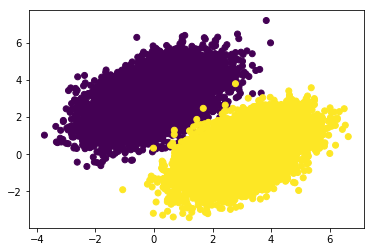

In [15]:
plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [18]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

In [19]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

In [23]:
for epoch in range(10):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(x, y)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.1063
Epoch 1: last batch loss = 0.0639
Epoch 2: last batch loss = 0.0376
Epoch 3: last batch loss = 0.0361
Epoch 4: last batch loss = 0.0385
Epoch 5: last batch loss = 0.0223
Epoch 6: last batch loss = 0.0327
Epoch 7: last batch loss = 0.0328
Epoch 8: last batch loss = 0.0241
Epoch 9: last batch loss = 0.0263


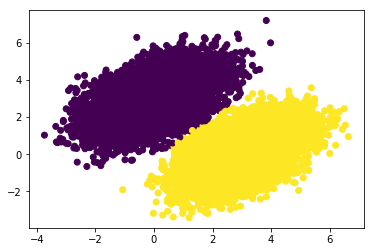

In [24]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)